In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from scipy.stats import ttest_ind
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline
import warnings
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")
df=pd.read_csv(r"C:\Users\hp\OneDrive - subho\Desktop\UNIFIED\Drugs, Side Effects and Medical Condition  (  ML _ FA _ DA projects )\drugs_side_effects_drugs_com.csv")
print(df)

           drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult

In [2]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [3]:
df.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [4]:
df.tail()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html
2930,setmelanotide,Weight Loss,hives ; difficult breathing; swelling of your ...,setmelanotide,Melanocortin receptor agonists,Imcivree,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/setmelanotide.html,https://www.drugs.com/condition/obesity.html


In [5]:
df.info

<bound method DataFrame.info of            drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of yo

In [6]:
 df.dtypes

drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc                            object
pregnancy_category                object
csa                               object
alcohol                           object
related_drugs                     object
medical_condition_description     object
rating                           float64
no_of_reviews                    float64
drug_link                         object
medical_condition_url             object
dtype: object

In [7]:
df = df.drop(['csa', 'drug_link', 'medical_condition_url'], axis=1)
df.tail()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN
2930,setmelanotide,Weight Loss,hives ; difficult breathing; swelling of your ...,setmelanotide,Melanocortin receptor agonists,Imcivree,0%,Rx,NaN,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN


In [8]:
#replacing the  null value with 0 in pregnancy_category, alcohol column
columns_to_be_modified = ['pregnancy_category', 'alcohol']
df[columns_to_be_modified] = df[columns_to_be_modified].apply(lambda col: col.fillna('0'))

In [9]:
df.tail()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,0,0,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN
2930,setmelanotide,Weight Loss,hives ; difficult breathing; swelling of your ...,setmelanotide,Melanocortin receptor agonists,Imcivree,0%,Rx,0,0,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN


In [10]:
# number of empty cell 
print(df.isnull().sum())

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                  0
alcohol                             0
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
dtype: int64


In [11]:
# Remove any empty values
df = df.dropna(axis=0)
print(df.isnull().sum())

drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
dtype: int64


In [12]:
print('Shape before deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (489, 14)


In [13]:
# Checking duplicates rows and Removing duplicate rows if any
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print('Shape After deleting duplicate values:', df.shape)

False    489
Name: count, dtype: int64
Shape After deleting duplicate values: (489, 14)


In [14]:
df.describe(include='all')

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
count,489,489,489,489,489,489,489,489,489,489,489,489,489.000000,489.000000
unique,488,45,485,404,171,485,65,3,7,2,285,45,NaN,NaN
top,ciclesonide,Acne,hives ; difficult breathing; swelling of your ...,isotretinoin (oral),Upper respiratory combinations,Bronkaid,0%,Rx,C,X,Farxiga: https://www.drugs.com/farxiga.html | ...,Acne Other names: Acne Vulgaris; Blackheads; B...,NaN,NaN
freq,2,39,2,4,19,2,74,383,235,261,18,39,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.849489,80.441718
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.221201,173.552471
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100000,12.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,61.000000


In [15]:
#Finging unique values for each column
#To understand which column is categorical and which one is Continuous
df.nunique()

drug_name                        488
medical_condition                 45
side_effects                     485
generic_name                     404
drug_classes                     171
brand_names                      485
activity                          65
rx_otc                             3
pregnancy_category                 7
alcohol                            2
related_drugs                    285
medical_condition_description     45
rating                            77
no_of_reviews                    167
dtype: int64

In [16]:
# Which medical_condition is treated by the highest number of unique drugs?

h = df.groupby('medical_condition')['drug_name'].nunique()

# Calculate percentage
percentage = (h / h.sum()) * 100

# Combine into one table
j = pd.DataFrame({'Unique Drug Count': h,'Percentage (%)': percentage.round(2)}).sort_values(by='Unique Drug Count', ascending=False)

print(j)

                      Unique Drug Count  Percentage (%)
medical_condition                                      
Acne                                 39            7.98
Hypertension                         34            6.95
Pain                                 30            6.13
Diabetes (Type 2)                    26            5.32
Diabetes (Type 1)                    21            4.29
Hayfever                             20            4.09
AIDS/HIV                             19            3.89
Migraine                             19            3.89
Insomnia                             18            3.68
Osteoarthritis                       18            3.68
Asthma                               16            3.27
Colds & Flu                          16            3.27
Constipation                         16            3.27
ADHD                                 16            3.27
Bipolar Disorder                     15            3.07
Anxiety                              15         

In [17]:


# Step 1: Group by 'medical_condition' and 'drug_name' and sum 'no_of_reviews'
h = df.groupby(['medical_condition', 'drug_name'])['no_of_reviews'].sum().reset_index()

# Step 2: Sort values by 'medical_condition' and 'no_of_reviews' in descending order
h_sorted = h.sort_values(by=['medical_condition', 'no_of_reviews'], ascending=[True, False])

# Step 3: Drop duplicates to get the top drug for each medical_condition
top_drugs = h_sorted.drop_duplicates(subset='medical_condition', keep='first')

# Step 4: Display the result
print(top_drugs[['medical_condition', 'drug_name', 'no_of_reviews']])




        medical_condition                                          drug_name  \
13                   ADHD                                    methylphenidate   
19               AIDS/HIV  bictegravir / emtricitabine / tenofovir alafen...   
65                   Acne                                       isotretinoin   
74              Allergies                                     levocetirizine   
75            Alzheimer's                                        galantamine   
76                 Angina                                         amlodipine   
86                Anxiety                                         alprazolam   
111                Asthma                                         prednisone   
123      Bipolar Disorder                                         lurasidone   
130            Bronchitis                                       azithromycin   
137                  COPD                                       umeclidinium   
138                Cancer               

In [18]:
# Step 1: Group by 'medical_condition' and 'drug_name' and sum 'no_of_reviews'
h = df.groupby(['medical_condition', 'drug_name'])['rating'].sum().reset_index()

# Step 2: Sort values by 'medical_condition' and 'no_of_reviews' in descending order
h_sorted = h.sort_values(by=['medical_condition', 'rating'], ascending=[True, False])

# Step 3: Drop duplicates to get the top drug for each medical_condition
top_drugs = h_sorted.drop_duplicates(subset='medical_condition', keep='first')

# Step 4: Display the result
print(top_drugs[['medical_condition', 'drug_name', 'rating']])

        medical_condition                                          drug_name  \
14                   ADHD                                         selegiline   
22               AIDS/HIV  cobicistat / elvitegravir / emtricitabine / te...   
42                   Acne                                          Clindagel   
74              Allergies                                     levocetirizine   
75            Alzheimer's                                        galantamine   
77                 Angina                                            aspirin   
82                Anxiety                                          Loreev XR   
101                Asthma                                            Xopenex   
126      Bipolar Disorder                                          tiagabine   
132            Bronchitis                                       erythromycin   
135                  COPD                        formoterol / glycopyrrolate   
138                Cancer               

In [19]:
# Weighted Score (no_of_reviews and rating)
df['overall_score'] = (df['rating'] * np.log10(df['no_of_reviews'] + 1))

In [20]:
# Step 1: Group by 'medical_condition' and 'drug_name' and sum 'overall_score'
h = df.groupby(['medical_condition', 'drug_name'])['overall_score'].sum().reset_index()

# Step 2: Sort values by 'medical_condition' and 'no_of_reviews' in descending order
h_sorted = h.sort_values(by=['medical_condition', 'overall_score'], ascending=[True, False])

# Step 3: Drop duplicates to get the top drug for each medical_condition
top_drugs = h_sorted.drop_duplicates(subset='medical_condition', keep='first')

# Step 4: Display the result
print(top_drugs[['medical_condition', 'drug_name', 'overall_score']])

        medical_condition                                          drug_name  \
13                   ADHD                                    methylphenidate   
22               AIDS/HIV  cobicistat / elvitegravir / emtricitabine / te...   
65                   Acne                                       isotretinoin   
74              Allergies                                     levocetirizine   
75            Alzheimer's                                        galantamine   
76                 Angina                                         amlodipine   
86                Anxiety                                         alprazolam   
111                Asthma                                         prednisone   
113      Bipolar Disorder                                           Lamictal   
130            Bronchitis                                       azithromycin   
135                  COPD                        formoterol / glycopyrrolate   
138                Cancer               

In [21]:
#What is the average overall_score of drugs for each medical condition?
h = df.groupby('medical_condition')['overall_score'].mean().sort_values(ascending=False)
print(h)

medical_condition
Erectile Dysfunction    17.903223
Anxiety                 15.286861
Migraine                12.453164
Bipolar Disorder        12.015586
ADHD                    11.501066
Hair Loss               11.390861
Allergies               10.952945
Depression              10.789750
Acne                    10.552724
Gout                    10.455992
Weight Loss             10.139824
Rheumatoid Arthritis     9.942147
Pain                     9.855803
Hypothyroidism           9.069934
Alzheimer's              9.022941
Insomnia                 8.924618
Osteoarthritis           8.619112
IBD (Bowel)              8.585466
Diabetes (Type 2)        8.453100
Menopause                8.188088
Constipation             8.056834
Schizophrenia            8.035870
Eczema                   7.796846
Bronchitis               7.618559
GERD (Heartburn)         7.233710
Asthma                   7.100740
Cholesterol              7.038890
Hypertension             6.916565
Incontinence             6.906

In [22]:
#What is the average rating of drugs for each medical condition?
h = df.groupby('medical_condition')['rating'].mean().sort_values(ascending=False)
print(h)

medical_condition
Stroke                  10.000000
Eczema                   8.811111
Swine Flu                8.650000
Gout                     8.366667
Erectile Dysfunction     8.350000
Schizophrenia            8.283333
Alzheimer's              8.100000
Anxiety                  8.026667
Weight Loss              7.880000
Migraine                 7.852632
Asthma                   7.806250
GERD (Heartburn)         7.754545
Pneumonia                7.750000
Depression               7.658333
Diabetes (Type 1)        7.595238
Seizures                 7.400000
Menopause                7.400000
Acne                     7.384615
ADHD                     7.350000
IBD (Bowel)              7.300000
Bipolar Disorder         7.180000
Psoriasis                7.153846
Constipation             7.150000
Pain                     7.030000
Rheumatoid Arthritis     6.850000
Angina                   6.833333
Hypothyroidism           6.650000
Insomnia                 6.505556
Osteoarthritis           6.327

In [23]:
# Which drugs have the highest and lowest number of reviews?

h = df.sort_values(by='no_of_reviews', ascending=False).head(1)
print('Drug with the highest number of reviews:', h['drug_name'].values[0], ', no of reviews:', h['no_of_reviews'].values[0])

h = df.sort_values(by='no_of_reviews', ascending=True).head(1)
print('Drug with the lowest number of reviews:', h['drug_name'].values[0], ', no of reviews:', h['no_of_reviews'].values[0])


Drug with the highest number of reviews: bisacodyl , no of reviews: 1357.0
Drug with the lowest number of reviews: neomycin , no of reviews: 1.0


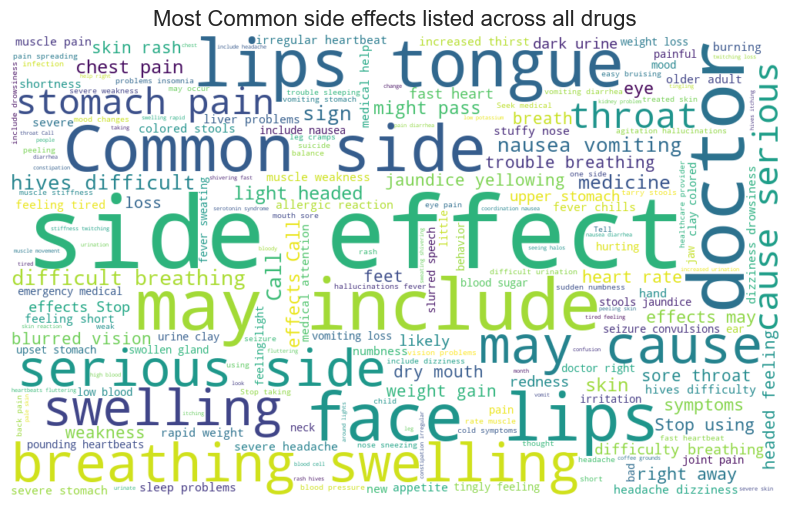

In [24]:
# What are the most common side effects listed across all drugs?

text =' '.join(df['side_effects'].dropna())
# Create the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common side effects listed across all drugs', fontsize=16)
plt.show()


Regression Equation: rating =  -0.0 × no of reviews + 6.9
R-squared: 0.002
P-value: 0.326


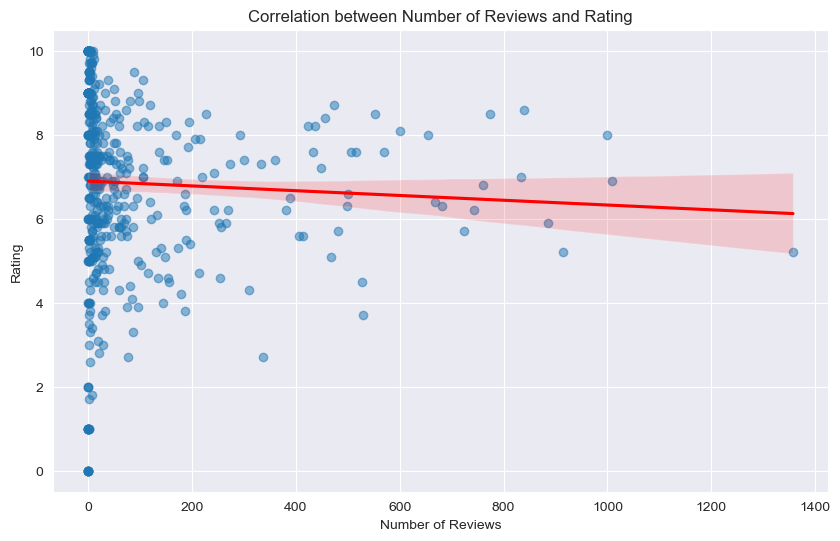

The correlation is weak — number of reviews does not explain much of the variation in rating.
The predictor 'number of reviews' is not statistically significant — the relationship with rating is likely due to random variation.


In [25]:
# Is there a correlation between the number of reviews and the rating of a drug?

df_clean = df[['no_of_reviews', 'rating']].dropna()

# Fit the regression model
X = df_clean['no_of_reviews']
y = df_clean['rating']

# Add constant for intercept
X_const = add_constant(X)

# Fit the regression model
model = OLS(y, X_const).fit()

# Get the regression equation
slope = model.params[1]
intercept = model.params[0]
r_squared = round(model.rsquared, 3)
p_value = model.pvalues['no_of_reviews']

# Print regression results
print("Regression Equation: rating = ", round(slope, 2), "× no of reviews +", round(intercept, 2))
print("R-squared:", round(r_squared, 3))
print("P-value:", round(p_value, 3))

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='no_of_reviews', y='rating', data=df_clean, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation between Number of Reviews and Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


if r_squared < 0.5:
    print("The correlation is weak — number of reviews does not explain much of the variation in rating.")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate — number of reviews explains a moderate amount of the variation in rating.")
else:
    print("The correlation is strong — number of reviews explains a significant amount of the variation in rating.")


if p_value < 0.01:
    print("The predictor 'number of reviews' is highly significant — the relationship with rating is very unlikely to be due to chance.")
elif 0.01 <= p_value < 0.05:
    print("The predictor 'number of reviews' is statistically significant — there is sufficient evidence to conclude the relationship with rating is real.")
elif 0.05 <= p_value < 0.1:
    print("The predictor 'number of reviews' is marginally significant — there is weak evidence that the relationship with rating is not due to chance.")
else:
    print("The predictor 'number of reviews' is not statistically significant — the relationship with rating is likely due to random variation.")


In [26]:
#How are average drug ratings distributed across prescription types (rx_otc)?

h = df.groupby('rx_otc')['rating'].mean().sort_values(ascending=False)
print(h)

rx_otc
Rx/OTC    6.972857
Rx        6.842037
OTC       6.688889
Name: rating, dtype: float64


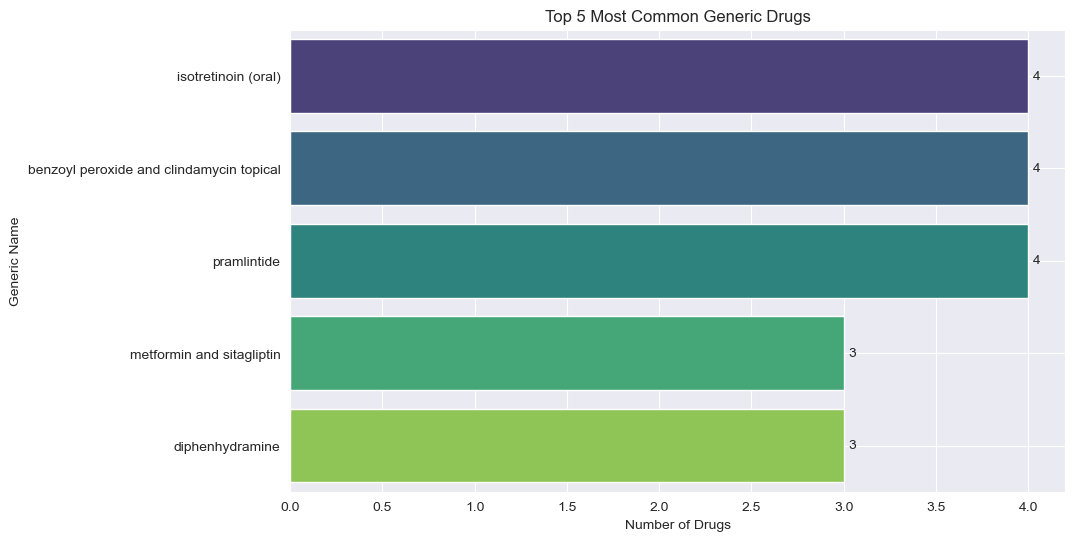

In [27]:
#Top 5 Most Common Generic Drugs

import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 most common generic names
top_generic = df['generic_name'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_generic.values, y=top_generic.index, palette='viridis')

# Add value labels
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)

# Titles and labels
plt.title('Top 5 Most Common Generic Drugs')
plt.xlabel('Number of Drugs')
plt.ylabel('Generic Name')
plt.grid(True)
plt.show()



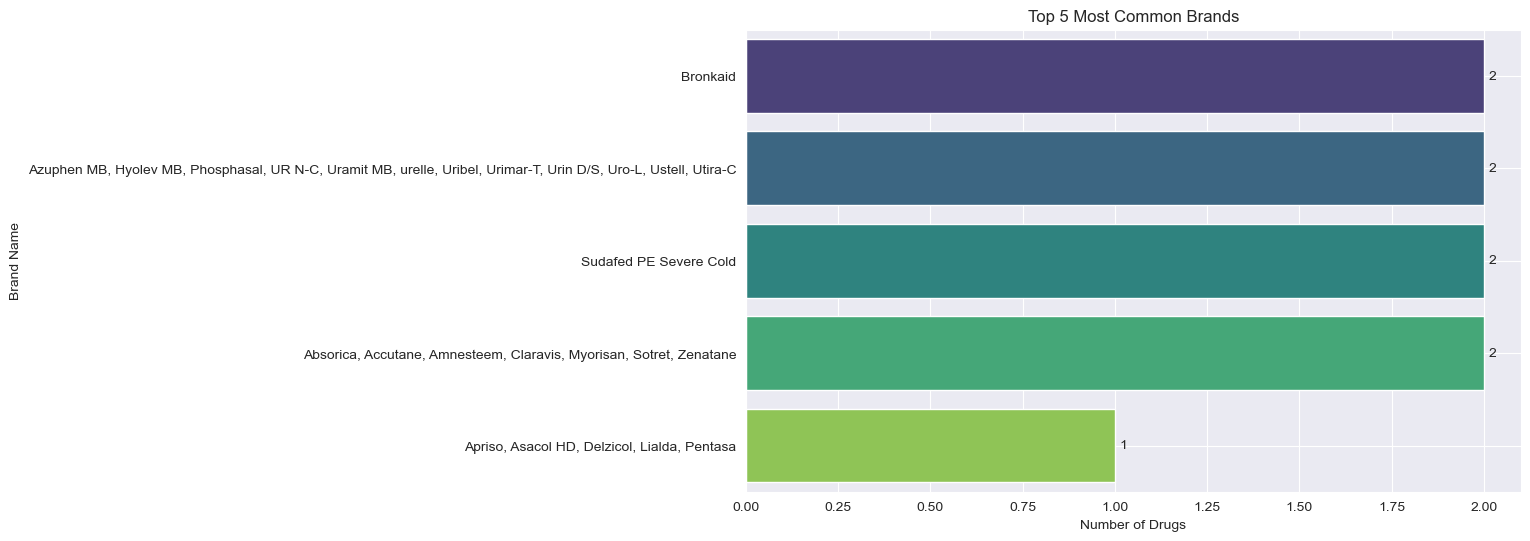

In [28]:
#Top 5 Most Common brand

import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 most common brand names
top_brand_names = df['brand_names'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_brand_names.values, y=top_brand_names.index, palette='viridis')

# Add value labels
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)

# Titles and labels
plt.title('Top 5 Most Common Brands')
plt.xlabel('Number of Drugs')
plt.ylabel('Brand Name')
plt.grid(True)
plt.show()


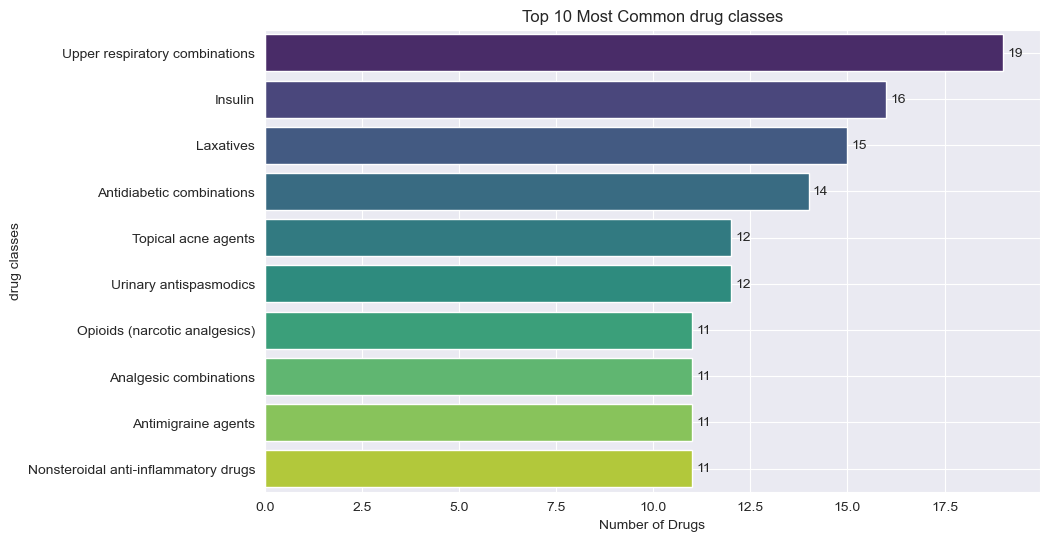

In [29]:
#Top 10 Most common drug classes

import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 most common drug classes
top_drug_classes = df['drug_classes'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
a = sns.barplot(x=top_drug_classes.values, y=top_drug_classes.index, palette='viridis')

# Add value labels
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)

# Titles and labels
plt.title('Top 10 Most Common drug classes')
plt.xlabel('Number of Drugs')
plt.ylabel('drug classes')
plt.grid(True)
plt.show()


In [30]:
#Number of drugs by medical condition for drugs under the low-risk pregnancy category

# Filter for low-risk pregnancy categories (A, B)
low_risk_df = df[df['pregnancy_category'].isin(['A', 'B'])]

# Create the table with pregnancy_category, medical_condition, and count of drugs
result_table = low_risk_df.groupby(['pregnancy_category', 'medical_condition'])['drug_name'].count().reset_index()

# Rename the count column for clarity
result_table.rename(columns={'drug_name': 'Number of Drugs'}, inplace=True)

# Sort the table by the number of drugs in descending order
sorted_result_table = result_table.sort_values(by='Number of Drugs', ascending=False)

# Display the table
print(sorted_result_table)

   pregnancy_category     medical_condition  Number of Drugs
11                  B     Diabetes (Type 1)               12
12                  B     Diabetes (Type 2)               12
2                   B              AIDS/HIV                8
15                  B              Hayfever                6
14                  B      GERD (Heartburn)                5
13                  B  Erectile Dysfunction                4
0                   A        Hypothyroidism                4
21                  B                  Pain                3
3                   B                  Acne                3
8                   B            Bronchitis                3
6                   B                Asthma                2
23                  B             Psoriasis                2
22                  B             Pneumonia                2
16                  B          Hypertension                2
18                  B          Incontinence                2
19                  B   

In [31]:
#Number of drugs by medical condition for drugs under the high-risk pregnancy category

# Filter for high risk categories (C, D, X)
high_risk_df = df[df['pregnancy_category'].isin(['C', 'D', 'X'])]

# Create the table with pregnancy_category, medical_condition, and count of drugs
result_table = high_risk_df.groupby(['pregnancy_category', 'medical_condition'])['drug_name'].count().reset_index()

# Rename the count column for clarity
result_table.rename(columns={'drug_name': 'Number of Drugs'}, inplace=True)

# Sort the table by the number of drugs in descending order
sorted_result_table = result_table.sort_values(by='Number of Drugs', ascending=False)

# Display the table
print(sorted_result_table)


   pregnancy_category     medical_condition  Number of Drugs
45                  D          Hypertension               22
29                  C                  Pain               21
2                   C                  Acne               16
22                  C              Hayfever               14
0                   C                  ADHD               12
16                  C     Diabetes (Type 2)               11
49                  X                  Acne               11
23                  C          Hypertension               10
6                   C                Asthma               10
26                  C              Migraine               10
12                  C          Constipation                9
7                   C      Bipolar Disorder                9
15                  C     Diabetes (Type 1)                9
18                  C                Eczema                8
11                  C           Colds & Flu                8
25                  C   

In [32]:
# Filter rows where alcohol restriction is 'X'
alcohol_restricted = df[df['alcohol'] == 'X']

# Group by medical_condition and count number of such drugs
h = alcohol_restricted['medical_condition'].value_counts()

# Calculate percentage of each condition
percentage = (h / h.sum()) * 100

# Combine into one table
j = pd.DataFrame({'Drug Count': h, 'Percentage (%)': percentage.round(2)}).sort_values(by='Drug Count', ascending=False)

# Show the result
print(j)


                      Drug Count  Percentage (%)
medical_condition                               
Diabetes (Type 2)             26            9.96
Pain                          24            9.20
Diabetes (Type 1)             20            7.66
Hypertension                  20            7.66
Insomnia                      18            6.90
Acne                          17            6.51
Bipolar Disorder              15            5.75
Anxiety                       15            5.75
Colds & Flu                   14            5.36
ADHD                          13            4.98
Depression                    11            4.21
Migraine                      10            3.83
Osteoarthritis                 9            3.45
Hayfever                       7            2.68
Incontinence                   6            2.30
Schizophrenia                  5            1.92
UTI                            5            1.92
Erectile Dysfunction           4            1.53
Cholesterol         

In [33]:
# Remove the % and convert to integer for activity column 
df['activity'] = df['activity'].str.replace('%', '').astype(float).astype(int)

Regression Equation: rating =  -0.0 × activity + 6.88
R-squared: 0.001
P-value: 0.614


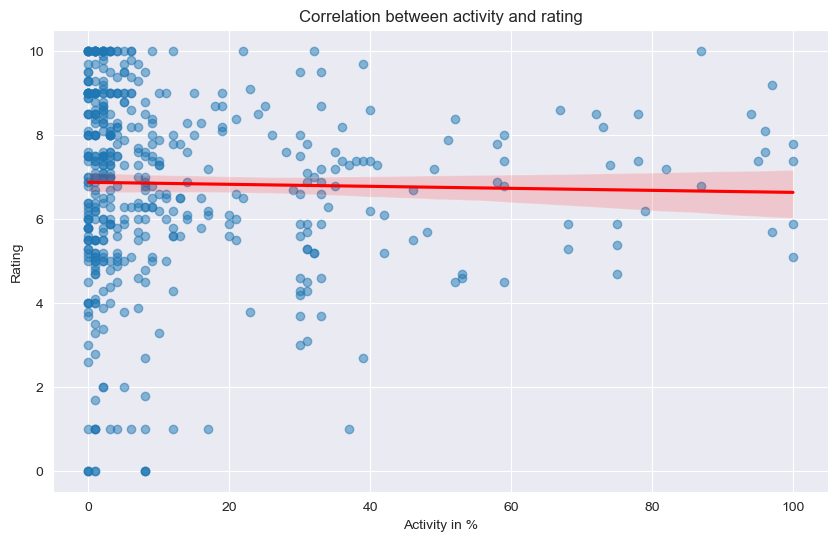

The correlation is weak — activity does not explain much of the variation in rating.
Activity is not statistically significant — the relationship with rating is likely due to random variation.


In [34]:
#What is the relationship between drug ‘activity’ percentage and user rating?

df_clean = df[['activity', 'rating']].dropna()

# Fit the regression model
X = df_clean['activity']
y = df_clean['rating']

# Add constant for intercept
X_const = add_constant(X)

# Fit the regression model
model = OLS(y, X_const).fit()

# Get the regression equation
slope = model.params[1]
intercept = model.params[0]
r_squared = round(model.rsquared, 3)
p_value = model.pvalues['activity']

# Print regression results
print("Regression Equation: rating = ", round(slope, 2), "× activity +", round(intercept, 2))
print("R-squared:", round(r_squared, 3))
print("P-value:", round(p_value, 3))

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='activity', y='rating', data=df_clean, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation between activity and rating')
plt.xlabel('Activity in %')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


if r_squared < 0.5:
    print("The correlation is weak — activity does not explain much of the variation in rating.")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate — activity explains a moderate amount of the variation in rating.")
else:
    print("The correlation is strong — activity explains a significant amount of the variation in rating.")


if p_value < 0.01:
    print('Activity is highly significant — the relationship with rating is very unlikely to be due to chance.')
elif 0.01 <= p_value < 0.05:
    print("Activity is statistically significant — there is sufficient evidence to conclude the relationship with rating is real.")
elif 0.05 <= p_value < 0.1:
    print("Activity is marginally significant — there is weak evidence that the relationship with rating is not due to chance.")
else:
    print("Activity is not statistically significant — the relationship with rating is likely due to random variation.")



In [35]:
# Do drugs categorized as ‘Rx’ tend to have higher overall score?

#hypothesis test

# Split the overall_score data based on rx_otc
rx_otc_overall_score = df[df['rx_otc'] == 'Rx']['overall_score']
non_rx_otc_overall_score = df[df['rx_otc'] != 'Rx']['overall_score']

# Perform independent t-test
t_stat, p_value = ttest_ind(rx_otc_overall_score, non_rx_otc_overall_score, equal_var=False)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Mean scores
rx_mean = rx_otc_overall_score.mean()
non_rx_mean = non_rx_otc_overall_score.mean()

print("Mean overall score for Rx drugs:", round(rx_mean, 2))
print("Mean overall score for non-Rx drugs:", round(non_rx_mean, 2))

# Hypothesis decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Rx categorized drugs have significantly different overall score.")
    if rx_mean > non_rx_mean:
        print("Rx drugs tend to have a higher overall score.")
    else:
        print("Rx drugs tend to have a lower overall score.")
else:
    print("Fail to reject the null hypothesis: No significant difference in overall score.")

T-statistic: 4.877
P-value: 0.0
Mean overall score for Rx drugs: 8.89
Mean overall score for non-Rx drugs: 6.38
Reject the null hypothesis: Rx categorized drugs have significantly different overall score.
Rx drugs tend to have a higher overall score.


In [36]:
#Do drugs with higher pregnancy risk (Category C,D,X) have higher overall score?

#hypothesis test

# Split the overall_score data based on pregnancy risk 

higher_pregnancy_risk_overall_score = df[df['pregnancy_category'].isin(['C', 'D', 'X'])]['overall_score']
lower_pregnancy_risk_overall_score = df[~df['pregnancy_category'].isin(['C', 'D', 'X'])]['overall_score']

# Perform independent t-test
t_stat, p_value = ttest_ind(higher_pregnancy_risk_overall_score, lower_pregnancy_risk_overall_score, equal_var=False)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Mean scores
higher_pregnancy_risk_mean = higher_pregnancy_risk_overall_score.mean()
lower_pregnancy_risk_mean = lower_pregnancy_risk_overall_score.mean()

print("Mean overall score for higher pregnancy risk drugs:", round(higher_pregnancy_risk_mean, 2))
print("Mean overall score for lower pregnancy risk drugs:", round(lower_pregnancy_risk_mean, 2))

# Hypothesis decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: higher pregnancy risk drugs have significantly different overall score.")
    if higher_pregnancy_risk_mean > lower_pregnancy_risk_mean:
        print("higher pregnancy risk drugs tend to have a higher overall score.")
    else:
        print("higher pregnancy risk drugs tend to have a lower overall score.")
else:
    print("Fail to reject the null hypothesis: No significant difference in overall score.")


T-statistic: 3.017
P-value: 0.0027
Mean overall score for higher pregnancy risk drugs: 8.87
Mean overall score for lower pregnancy risk drugs: 7.44
Reject the null hypothesis: higher pregnancy risk drugs have significantly different overall score.
higher pregnancy risk drugs tend to have a higher overall score.


In [41]:
# Machine Learning

# Predicting the overall_score based on the features in the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label Encoding categorical features
label_encoder = LabelEncoder()

df['medical_condition'] = label_encoder.fit_transform(df['medical_condition'])
df['drug_classes'] = label_encoder.fit_transform(df['drug_classes'])
df['rx_otc'] = label_encoder.fit_transform(df['rx_otc'])
df['pregnancy_category'] = label_encoder.fit_transform(df['pregnancy_category'])
df['alcohol'] = label_encoder.fit_transform(df['alcohol'])


# Define features and target variable
X = df[['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol', 'activity']]
y = df['overall_score']

# Handle missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [42]:
#REGRESSION MODEL RANDOM FOREST 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE (Random forest):", rmse)
print('MSE (Random forest):', mse)
print('R² (Random forest):', r2)


RMSE (Random forest): 4.43010066398132
MSE (Random forest): 19.625791893007737
R² (Random forest): 0.314275100304532


In [43]:
#REGRESSION MODEL SVR MODEL

# Scale the features (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model training with SVR
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# Prediction and inverse scaling
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE (SVR):", rmse)
print("MSE (SVR):", mse)
print("R² (SVR):", r2)

RMSE (SVR): 5.788622085678783
MSE (SVR): 33.50814565080819
R² (SVR): -0.17077414968248705


In [46]:
#REGRESSION MODEL SGD MODEL

# Train the SGD Regressor
model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.01))
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE (SGD):", rmse)
print("MSE (SGD):", mse)
print("R² (SGD):", r2)

RMSE (SGD): 4.76774111543045
MSE (SGD): 22.731355343765994
R² (SGD): 0.20576675590861304


In [47]:
#REGRESSION MODEL DECISSION TREE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features (if required, though not always needed for Decision Tree)
scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Model training with Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE (Decission tree):", rmse)
print("MSE (Decission tree):", mse)
print("R² (Decission tree):", r2)


RMSE (Decission tree): 6.304175719435847
MSE (Decission tree): 39.74263150152448
R² (Decission tree): -0.3886069998391415


In [48]:
#REGRESSION MODEL GRADIENT BOOSTING REGRESSOR

gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

# Perform GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_gbr.fit(X_train, y_train)

# Best parameters and model evaluation
best_gbr_model = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr_model.predict(X_test)

# Evaluation
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Best Parameters (GBR):", grid_search_gbr.best_params_)
print("RMSE (GBR):", rmse_gbr)
print("MSE (GBR):", mse_gbr)
print("R² (GBR):", r2_gbr)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (GBR): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
RMSE (GBR): 4.442036070120998
MSE (GBR): 19.731684448256
R² (GBR): 0.3105752158758184


In [49]:
#REGRESSION MODEL xGBoost

xgb_model = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Best parameters and model evaluation
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
print("RMSE (XGBoost):", rmse_xgb)
print("MSE (XGBoost):", mse_xgb)
print("R² (XGBoost):", r2_xgb)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
RMSE (XGBoost): 4.407102019535134
MSE (XGBoost): 19.422548210590655
R² (XGBoost): 0.3213764317819561


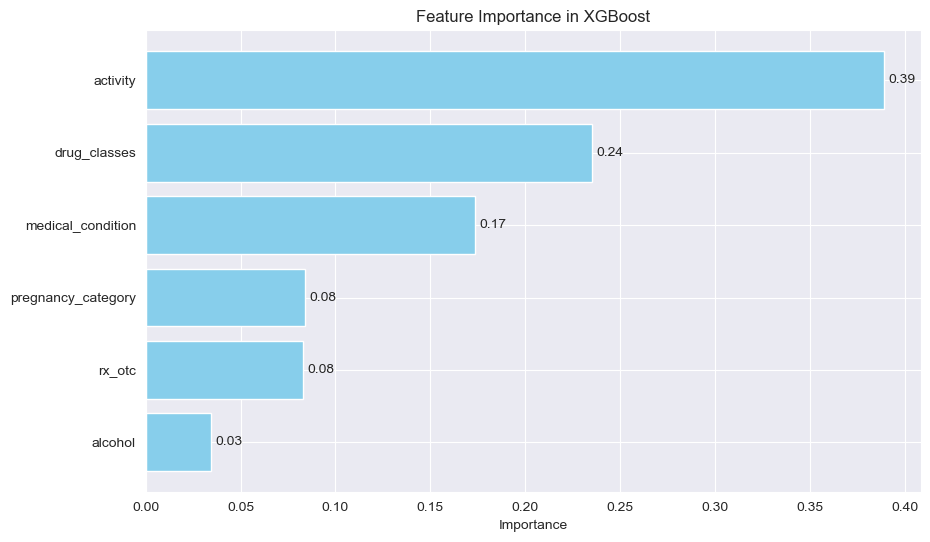

In [50]:
#Feature Importance in xGBoost

importances = model.feature_importances_
features = X.columns

# Create a DataFrame to store features and their importance
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features based on importance
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')

# Add labels to the bars
ax.bar_label(bars, label_type='edge', padding=3, fontsize=10, fmt='%.2f')

# Set labels and title
ax.set_xlabel("Importance")
ax.set_title("Feature Importance in XGBoost")
ax.invert_yaxis() 

# Show plot
plt.show()


In [52]:
# Classification model (Random Forest) for overall_score classification

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Binning overall_score into 3 categories
df['overall_score_class'] = pd.qcut(df['overall_score'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df[['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol','activity']].copy()
y = df['overall_score_class']

# Label encoding for categorical columns
label_encoder = LabelEncoder()  
X['medical_condition'] = label_encoder.fit_transform(X['medical_condition'])
X['drug_classes'] = label_encoder.fit_transform(X['drug_classes'])
X['rx_otc'] = label_encoder.fit_transform(X['rx_otc'])
X['pregnancy_category'] = label_encoder.fit_transform(X['pregnancy_category'])
X['alcohol'] = label_encoder.fit_transform(X['alcohol'])
    
# Encode target
y = LabelEncoder().fit_transform(y)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train Random Forest with class_weight
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predict
y_pred_class = rf_clf.predict(X_test)

# Evaluation
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Class distribution: {0: 163, 1: 163, 2: 163}
Accuracy: 42.18%
Balanced Accuracy: 0.4217687074829932
F1 Score (Macro): 0.4235544217687075
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        49
           1       0.41      0.41      0.41        49
           2       0.29      0.31      0.30        49

    accuracy                           0.42       147
   macro avg       0.43      0.42      0.42       147
weighted avg       0.43      0.42      0.42       147

Confusion Matrix:
[[27  8 14]
 [ 7 20 22]
 [13 21 15]]


In [53]:
# Classification model (SGD) for overall_score classification

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Binning overall_score into 3 categories
df['overall_score_class'] = pd.qcut(df['overall_score'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df[['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol', 'activity']].copy()
y = df['overall_score_class']

# Label encoding for categorical columns
label_cols = ['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol']
for col in label_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Target encoding
y = LabelEncoder().fit_transform(y)

# Feature scaling (important for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Train SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, penalty='l2', random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict
y_pred_class = sgd_clf.predict(X_test)

# Evaluation
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Accuracy: 34.01%
Balanced Accuracy: 0.3401360544217687
F1 Score (Macro): 0.30240506136796713
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.47      0.41        49
           1       0.23      0.06      0.10        49
           2       0.34      0.49      0.40        49

    accuracy                           0.34       147
   macro avg       0.31      0.34      0.30       147
weighted avg       0.31      0.34      0.30       147

Confusion Matrix:
[[23  4 22]
 [22  3 24]
 [19  6 24]]


In [55]:
# Classification model (SVC) for overall_score classification

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Binning overall_score into 3 categories
df['overall_score_class'] = pd.qcut(df['overall_score'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df[['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol', 'activity']].copy()
y = df['overall_score_class']

# Label encoding for categorical columns
label_cols = ['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol']
for col in label_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Target encoding
y = LabelEncoder().fit_transform(y)

# Feature scaling (important for SVC)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Train SVC (Support Vector Classification)
svc_clf = SVC(kernel='rbf', random_state=42)  # You can use different kernels like 'linear', 'poly', etc.
svc_clf.fit(X_train, y_train)

# Predict
y_pred_class = svc_clf.predict(X_test)

# Evaluation
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Accuracy: 42.18%
Balanced Accuracy: 0.4217687074829932
F1 Score (Macro): 0.41633850086985436
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49        49
           1       0.42      0.51      0.46        49
           2       0.33      0.27      0.30        49

    accuracy                           0.42       147
   macro avg       0.42      0.42      0.42       147
weighted avg       0.42      0.42      0.42       147

Confusion Matrix:
[[24 11 14]
 [12 25 12]
 [12 24 13]]


In [56]:
# Classification model (Gradient Boosting) for overall_score classification

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Binning overall_score into 3 categories
df['overall_score_class'] = pd.qcut(df['overall_score'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df[['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol', 'activity']].copy()
y = df['overall_score_class']

# Label encoding for categorical columns
label_cols = ['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol']
for col in label_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Target encoding
y = LabelEncoder().fit_transform(y)

# Feature scaling (important for Gradient Boosting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can tune `n_estimators` and other hyperparameters
gb_clf.fit(X_train, y_train)

# Predict
y_pred_class = gb_clf.predict(X_test)

# Evaluation
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Accuracy: 38.78%
Balanced Accuracy: 0.38775510204081637
F1 Score (Macro): 0.39043533185715096
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        49
           1       0.40      0.39      0.40        49
           2       0.28      0.31      0.29        49

    accuracy                           0.39       147
   macro avg       0.39      0.39      0.39       147
weighted avg       0.39      0.39      0.39       147

Confusion Matrix:
[[23  9 17]
 [ 8 19 22]
 [15 19 15]]


In [57]:
# Classification model (XGBoost) for overall_score classification

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBoost Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score

# Binning overall_score into 3 categories
df['overall_score_class'] = pd.qcut(df['overall_score'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df[['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol', 'activity']].copy()
y = df['overall_score_class']

# Label encoding for categorical columns
label_cols = ['medical_condition', 'drug_classes', 'rx_otc', 'pregnancy_category', 'alcohol']
for col in label_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Target encoding
y = LabelEncoder().fit_transform(y)

# Feature scaling (important for XGBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')  # Avoid deprecation warning
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_class = xgb_clf.predict(X_test)

# Evaluation
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))


Accuracy: 40.14%
Balanced Accuracy: 0.4013605442176871
F1 Score (Macro): 0.40214285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        49
           1       0.38      0.37      0.38        49
           2       0.25      0.27      0.26        49

    accuracy                           0.40       147
   macro avg       0.40      0.40      0.40       147
weighted avg       0.40      0.40      0.40       147

Confusion Matrix:
[[28  8 13]
 [ 6 18 25]
 [15 21 13]]


In [ ]:
# IN CLASSIFICATIO MODEL RANDOM FOREST WORK BEST